In [1]:
# CH4. MNIST
# ACtivation Function: sigmoid, tanh, ReLU, LeakyReLU, PReLU
from sklearn import datasets
import scipy.io
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# MNIST 다운로드
mnist1 = datasets.fetch_mldata('MNIST original', data_home='.')

# 에러가 발생하여 https://github.com/wikibook/deep-learning-with-tensorflow 에서 다운로드 후 mldata 폴더에 삽입함
# MNIST 파일 (mnist-original.mat) 읽기
mnist = scipy.io.loadmat('./mldata/mnist-original.mat')
mnist_data = mnist['data']
mnist_label = mnist['label']
mnist_data = mnist_data.T
mnist_label = mnist_label

n=len(mnist1.data) #n = len(mnist_data)
N = 10000 # MNIST의 부분적인 데이터로 실험
indices = np.random.permutation(range(n))[:N] # 무작위로 N장을 선택한다.
X=mnist1.data[indices]#X = mnist_data[indices]
y=mnist1.target[indices]#y = mnist_label[:,indices]
Y=np.eye(10)[y.astype(int)] #Y = np.eye(10)[y.astype(int)] # 1-of-K 표현으로 변환 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('y shape: ', y.shape)
print('Y shape: ', Y.shape)
#print(y)
#print()
#print(Y)
# Model 생성
n_in = len(X[0]) # 784 (32*32)
n_hidden = 200
n_out = len(Y[0]) # 10

# ACtivation function: Sigmoid
model_sigmoid = Sequential()
model_sigmoid .add(Dense(n_hidden, input_dim=n_in))
model_sigmoid .add(Activation('sigmoid'))

model_sigmoid .add(Dense(n_hidden))
model_sigmoid .add(Activation('sigmoid'))

model_sigmoid .add(Dense(n_hidden))
model_sigmoid .add(Activation('sigmoid'))

model_sigmoid .add(Dense(n_out))
model_sigmoid .add(Activation('softmax')) # multi-class

model_sigmoid .compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# ACtivation function: tanh function -> sigmoid의 도함수의 최댓값이 0.25이다. tanh의 도함수의 최댓값은 1(sigmoid을 닮았고 경로 손실x)
model_tanh = Sequential()
model_tanh .add(Dense(n_hidden, input_dim=n_in))
model_tanh .add(Activation('tanh'))

model_tanh .add(Dense(n_hidden))
model_tanh .add(Activation('tanh'))

model_tanh .add(Dense(n_hidden))
model_tanh .add(Activation('tanh'))

model_tanh .add(Dense(n_out))
model_tanh .add(Activation('softmax')) # multi-class

model_tanh .compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# ACtivation function: ReLU -> tanh도 마찬가지로 고차원 데이터를 다룰 경우 경사가 소실되는 문제가 발생, 지수함수를 포함하지 않고
#                           단순한 수식으로 표현되어 빠르게 계산됨
model_ReLU = Sequential()
model_ReLU .add(Dense(n_hidden, input_dim=n_in))
model_ReLU .add(Activation('relu'))

model_ReLU .add(Dense(n_hidden))
model_ReLU .add(Activation('relu'))

model_ReLU .add(Dense(n_hidden))
model_ReLU .add(Activation('relu'))

model_ReLU .add(Dense(n_out))
model_ReLU .add(Activation('softmax')) # multi-class

model_ReLU .compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# ACtivation function: LeaklyReLU -> ReLU에서 x<0일 때 경사가 사라져버려서 학습 과정이 불안정해짐
from keras.layers.advanced_activations import LeakyReLU
alpha = 0.01 # f(x)=max(ax, x)
model_LeakyReLU = Sequential()
model_LeakyReLU .add(Dense(n_hidden, input_dim=n_in))
model_LeakyReLU .add(LeakyReLU(alpha=alpha))

model_LeakyReLU .add(Dense(n_hidden))
model_LeakyReLU .add(LeakyReLU(alpha=alpha))

model_LeakyReLU .add(Dense(n_hidden))
model_LeakyReLU .add(LeakyReLU(alpha=alpha))

model_LeakyReLU .add(Dense(n_out))
model_LeakyReLU .add(Activation('softmax')) # multi-class

model_LeakyReLU .compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# Activation function: Parametric ReLU -> LeakyReLU에서 x<0일 때 경사가 a로 고정되어 있지만 이 부분도 학습을 하자
from keras.layers.advanced_activations import PReLU
model_PReLU = Sequential()
model_PReLU .add(Dense(n_hidden, input_dim=n_in))
model_PReLU .add(PReLU())

model_PReLU .add(Dense(n_hidden))
model_PReLU .add(PReLU())

model_PReLU .add(Dense(n_hidden))
model_PReLU .add(PReLU())

model_PReLU .add(Dense(n_out))
model_PReLU .add(Activation('softmax')) # multi-class

model_PReLU .compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])


# 학습
epochs = 100
batch_size = 10
print('---------------------Sigmoid function---------------------')
model_sigmoid .fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
print('----------------------------------------------------------')
print('---------------------Tanh function---------------------')
model_tanh .fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
print('----------------------------------------------------------')
print('---------------------ReLU function---------------------')
model_ReLU.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
print('----------------------------------------------------------')
print('---------------------LeakyReLU function---------------------')
model_LeakyReLU.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
print('----------------------------------------------------------')
print('---------------------PReLU function---------------------')
model_PReLU.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
print('----------------------------------------------------------')
# 예측 정확도 평가
print('---------------------Prediction accuracy Evalutation---------------------')
loss_and_metrics_sigmoid = model_sigmoid.evaluate(X_test, Y_test)
loss_and_metrics_tanh = model_tanh.evaluate(X_test, Y_test)
loss_and_metrics_ReLU = model_ReLU.evaluate(X_test, Y_test)
loss_and_metrics_LeakyReLU = model_LeakyReLU.evaluate(X_test, Y_test)
loss_and_metrics_PReLU = model_ReLU.evaluate(X_test, Y_test)
print('sigmoid: ', loss_and_metrics_sigmoid)
print('tanh: ', loss_and_metrics_tanh)
print('ReLU: ', loss_and_metrics_ReLU)
print('LeakyReLU: ', loss_and_metrics_LeakyReLU)
print('PReLU: ', loss_and_metrics_PReLU)

Using TensorFlow backend.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


X train shape:  (8000, 784)
Y train shape:  (8000, 10)
y shape:  (10000,)
Y shape:  (10000, 10)
---------------------Sigmoid function---------------------
Epoch 1/100
8000/8000 [==============================] - 1s 184us/step - loss: 2.2522 - acc: 0.1921
Epoch 2/100
8000/8000 [==============================] - 1s 132us/step - loss: 2.0387 - acc: 0.4409
Epoch 3/100
8000/8000 [==============================] - 1s 134us/step - loss: 1.6070 - acc: 0.6263
Epoch 4/100
8000/8000 [==============================] - 1s 133us/step - loss: 1.1545 - acc: 0.7255
Epoch 5/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.8781 - acc: 0.7924
Epoch 6/100
8000/8000 [==============================] - 1s 133us/step - loss: 0.7085 - acc: 0.8336
Epoch 7/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.6086 - acc: 0.8545
Epoch 8/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.5454 - acc: 0.8680
Epoch 9/100
8000/8000 [======================

8000/8000 [==============================] - 1s 131us/step - loss: 0.4204 - acc: 0.8697
Epoch 81/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.4321 - acc: 0.8657
Epoch 82/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.4232 - acc: 0.8680
Epoch 83/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4116 - acc: 0.8724
Epoch 84/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4194 - acc: 0.8680
Epoch 85/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4015 - acc: 0.8690
Epoch 86/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.4063 - acc: 0.8714
Epoch 87/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4367 - acc: 0.8591
Epoch 88/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4318 - acc: 0.8605
Epoch 89/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.4004 - acc: 0.8769
Epo

8000/8000 [==============================] - 1s 142us/step - loss: 0.9724 - acc: 0.6480
Epoch 61/100
8000/8000 [==============================] - 1s 147us/step - loss: 1.0348 - acc: 0.6153
Epoch 62/100
8000/8000 [==============================] - 1s 137us/step - loss: 1.0900 - acc: 0.5815
Epoch 63/100
8000/8000 [==============================] - 1s 136us/step - loss: 1.0336 - acc: 0.6118
Epoch 64/100
8000/8000 [==============================] - 1s 166us/step - loss: 1.0258 - acc: 0.6181
Epoch 65/100
8000/8000 [==============================] - 1s 160us/step - loss: 1.0318 - acc: 0.6104
Epoch 66/100
8000/8000 [==============================] - 1s 149us/step - loss: 1.0093 - acc: 0.6268
Epoch 67/100
8000/8000 [==============================] - 1s 161us/step - loss: 0.9964 - acc: 0.6390
Epoch 68/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.9878 - acc: 0.6424
Epoch 69/100
8000/8000 [==============================] - 1s 133us/step - loss: 1.0676 - acc: 0.6134
Epo

8000/8000 [==============================] - 1s 153us/step - loss: 14.7460 - acc: 0.0851
Epoch 40/100
8000/8000 [==============================] - 1s 155us/step - loss: 14.7460 - acc: 0.0851
Epoch 41/100
8000/8000 [==============================] - 1s 157us/step - loss: 14.7460 - acc: 0.0851
Epoch 42/100
8000/8000 [==============================] - 1s 158us/step - loss: 14.7460 - acc: 0.0851
Epoch 43/100
8000/8000 [==============================] - 1s 158us/step - loss: 14.7460 - acc: 0.0851
Epoch 44/100
8000/8000 [==============================] - 1s 158us/step - loss: 14.7460 - acc: 0.0851
Epoch 45/100
8000/8000 [==============================] - 1s 152us/step - loss: 14.7460 - acc: 0.0851
Epoch 46/100
8000/8000 [==============================] - 1s 153us/step - loss: 14.7460 - acc: 0.0851
Epoch 47/100
8000/8000 [==============================] - 1s 162us/step - loss: 14.7460 - acc: 0.0851
Epoch 48/100
8000/8000 [==============================] - 2s 231us/step - loss: 14.7460 - acc: 

8000/8000 [==============================] - 1s 157us/step - loss: 14.5083 - acc: 0.0999
Epoch 19/100
8000/8000 [==============================] - 1s 157us/step - loss: 14.5083 - acc: 0.0999
Epoch 20/100
8000/8000 [==============================] - 1s 157us/step - loss: 14.5083 - acc: 0.0999
Epoch 21/100
8000/8000 [==============================] - 1s 157us/step - loss: 14.5083 - acc: 0.0999
Epoch 22/100
8000/8000 [==============================] - 1s 157us/step - loss: 14.5083 - acc: 0.0999
Epoch 23/100
8000/8000 [==============================] - 1s 157us/step - loss: 14.5083 - acc: 0.0999
Epoch 24/100
8000/8000 [==============================] - 1s 157us/step - loss: 14.5083 - acc: 0.0999
Epoch 25/100
8000/8000 [==============================] - 1s 159us/step - loss: 14.5083 - acc: 0.0999
Epoch 26/100
8000/8000 [==============================] - 1s 158us/step - loss: 14.5083 - acc: 0.0999
Epoch 27/100
8000/8000 [==============================] - 1s 158us/step - loss: 14.5083 - acc: 

8000/8000 [==============================] - 1s 163us/step - loss: 14.5083 - acc: 0.0999
Epoch 99/100
8000/8000 [==============================] - 1s 164us/step - loss: 14.5083 - acc: 0.0999
Epoch 100/100
8000/8000 [==============================] - 1s 169us/step - loss: 14.5083 - acc: 0.0999
----------------------------------------------------------
---------------------PReLU function---------------------
Epoch 1/100
8000/8000 [==============================] - 2s 211us/step - loss: 14.7438 - acc: 0.0851
Epoch 2/100
8000/8000 [==============================] - 1s 187us/step - loss: 14.7460 - acc: 0.0851
Epoch 3/100
8000/8000 [==============================] - 1s 183us/step - loss: 14.7460 - acc: 0.0851
Epoch 4/100
8000/8000 [==============================] - 1s 168us/step - loss: 14.7460 - acc: 0.0851
Epoch 5/100
8000/8000 [==============================] - 1s 177us/step - loss: 14.7460 - acc: 0.0851
Epoch 6/100
8000/8000 [==============================] - 1s 168us/step - loss: 14.746

8000/8000 [==============================] - 1s 163us/step - loss: 14.7460 - acc: 0.0851
Epoch 78/100
8000/8000 [==============================] - 1s 164us/step - loss: 14.7460 - acc: 0.0851
Epoch 79/100
8000/8000 [==============================] - 1s 164us/step - loss: 14.7460 - acc: 0.0851
Epoch 80/100
8000/8000 [==============================] - 1s 164us/step - loss: 14.7460 - acc: 0.0851
Epoch 81/100
8000/8000 [==============================] - 1s 165us/step - loss: 14.7460 - acc: 0.0851
Epoch 82/100
8000/8000 [==============================] - 1s 165us/step - loss: 14.7460 - acc: 0.0851
Epoch 83/100
8000/8000 [==============================] - 1s 163us/step - loss: 14.7460 - acc: 0.0851
Epoch 84/100
8000/8000 [==============================] - 1s 163us/step - loss: 14.7460 - acc: 0.0851
Epoch 85/100
8000/8000 [==============================] - 1s 169us/step - loss: 14.7460 - acc: 0.0851
Epoch 86/100
8000/8000 [==============================] - 1s 165us/step - loss: 14.7460 - acc: 

---------------------ReLU & Dropout---------------------
Train on 1600 samples, validate on 6400 samples
Epoch 1/50
1600/1600 [==============================] - 1s 447us/step - loss: 2.2994 - acc: 0.1175 - val_loss: 2.2932 - val_acc: 0.2036
Epoch 2/50
1600/1600 [==============================] - 0s 104us/step - loss: 2.2881 - acc: 0.1488 - val_loss: 2.2765 - val_acc: 0.1453
Epoch 3/50
1600/1600 [==============================] - 0s 90us/step - loss: 2.2699 - acc: 0.1500 - val_loss: 2.2388 - val_acc: 0.1208
Epoch 4/50
1600/1600 [==============================] - 0s 95us/step - loss: 2.2308 - acc: 0.1406 - val_loss: 2.1583 - val_acc: 0.2123
Epoch 5/50
1600/1600 [==============================] - 0s 95us/step - loss: 2.1377 - acc: 0.1969 - val_loss: 2.0064 - val_acc: 0.4239
Epoch 6/50
1600/1600 [==============================] - 0s 94us/step - loss: 1.9771 - acc: 0.3100 - val_loss: 1.7203 - val_acc: 0.5009
Epoch 7/50
1600/1600 [==============================] - 0s 90us/step - loss: 1.6924

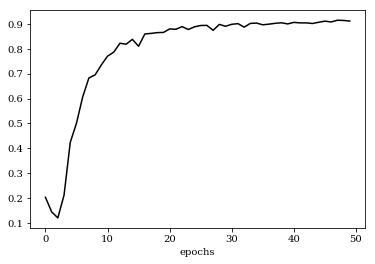

In [35]:
# Dropout
n_in = len(X[0])  # 784
n_hiddens = [200, 200, 200]
n_out = len(Y[0])  # 10
dropout = 0.5
epochs = 50
batch_size = 100
# 모델 생성
from keras.layers.core import Dropout
from keras import backend as K
def weight_variable(shape):
    return K.truncated_normal(shape, stddev=0.01)
    # return np.random.normal(scale=0.01, size=shape)


model = Sequential()
for i, input_dim in enumerate(([n_in] + n_hiddens)[:-1]):
    model.add(Dense(n_hiddens[i], input_dim=input_dim,
                    kernel_initializer=weight_variable))
    model.add(Activation(activation))
    model.add(Dropout(dropout))

model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])


# Validation
N_train = 0.8
N_validation = 0.2
# 전체 데이터를 test와 (train, validation) 데이터 셋으로 분류
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=N_train)
# train와 validation 데이터 셋으로 분류
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, train_size=N_validation)

print('---------------------ReLU & Dropout---------------------')
hist = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                validation_data = (X_validation, Y_validation))
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']
print('----------------------------------------------------------')
loss_and_metrics = model.evaluate(X_test, Y_test)
print('ReLU & Dropout: ', loss_and_metrics)


# 평가
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(epochs), val_acc, label='acc', color='black')
plt.xlabel('epochs')
plt.show()

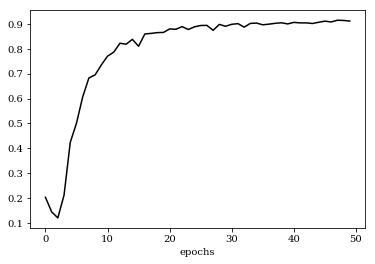

In [36]:

# 평가
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(epochs), val_acc, label='acc', color='black')
plt.xlabel('epochs')
plt.show()